# 01 - Exploratory Data Analysis (EDA)

This notebook performs exploratory data analysis on the AI Job Salary dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

%matplotlib inline

## 1. Load Dataset

In [2]:
df = pd.read_csv('../data/ai_job_dataset.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (15000, 19)


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

## 2. Missing Values Analysis

In [4]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})
missing_df[missing_df['Missing Count'] > 0].sort_values('Missing %', ascending=False)

,Missing Count,Missing %


In [5]:
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Columns with missing values: {(df.isnull().sum() > 0).sum()}")

Total missing values: 0
Columns with missing values: 0


## 3. Target Variable Analysis (salary_usd)

In [6]:
print("Salary (USD) Statistics:")
print(df['salary_usd'].describe())

Salary (USD) Statistics:
count     15000.000000
mean     115348.965133
std       60260.940438
min       32519.000000
25%       70179.750000
50%       99705.000000
75%      146408.500000
max      399095.000000
Name: salary_usd, dtype: float64


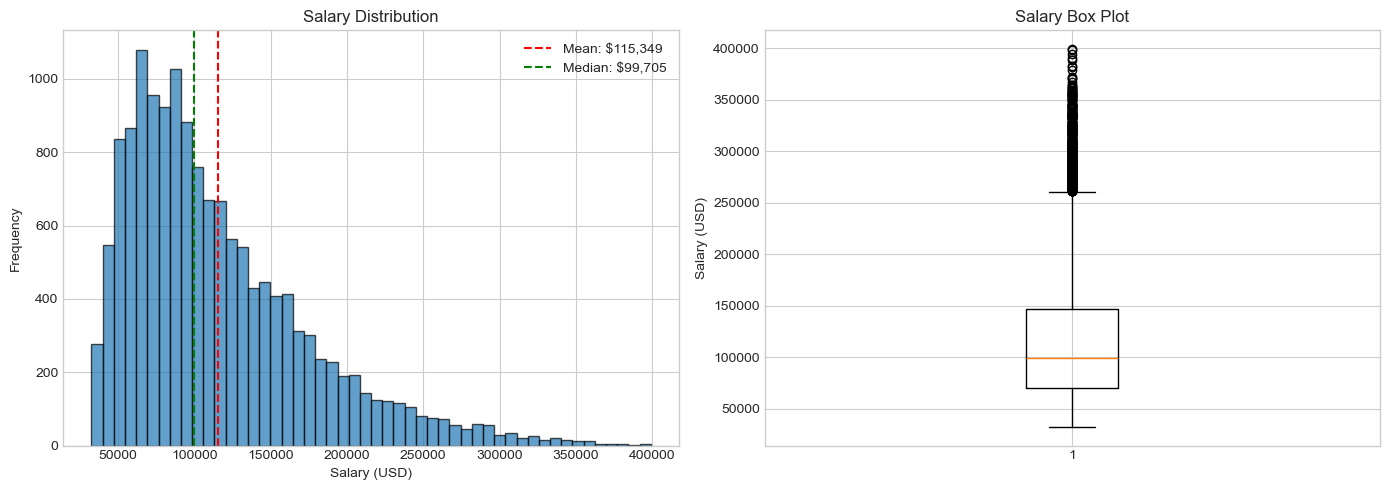

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution
axes[0].hist(df['salary_usd'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df['salary_usd'].mean(), color='red', linestyle='--', label=f"Mean: ${df['salary_usd'].mean():,.0f}")
axes[0].axvline(df['salary_usd'].median(), color='green', linestyle='--', label=f"Median: ${df['salary_usd'].median():,.0f}")
axes[0].set_xlabel('Salary (USD)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Salary Distribution')
axes[0].legend()

# Box plot
axes[1].boxplot(df['salary_usd'], vert=True)
axes[1].set_ylabel('Salary (USD)')
axes[1].set_title('Salary Box Plot')

plt.tight_layout()
plt.show()

## 4. Categorical Features Analysis

In [8]:
categorical_cols = ['experience_level', 'employment_type', 'company_size', 'remote_ratio', 
                    'education_required', 'job_title', 'company_location', 'industry']

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


experience_level:
experience_level
MI    3781
EX    3760
SE    3741
EN    3718
Name: count, dtype: int64

employment_type:
employment_type
FT    3812
FL    3758
CT    3721
PT    3709
Name: count, dtype: int64

company_size:
company_size
S    5007
L    4998
M    4995
Name: count, dtype: int64

remote_ratio:
remote_ratio
0      5075
50     5005
100    4920
Name: count, dtype: int64

education_required:
education_required
Bachelor     3789
Associate    3785
Master       3748
PhD          3678
Name: count, dtype: int64

job_title:
job_title
Machine Learning Researcher    808
AI Software Engineer           784
Autonomous Systems Engineer    777
Machine Learning Engineer      772
AI Architect                   771
Head of AI                     765
NLP Engineer                   762
Robotics Engineer              759
Data Analyst                   759
AI Research Scientist          756
Data Engineer                  749
AI Product Manager             743
Research Scientist             742
P

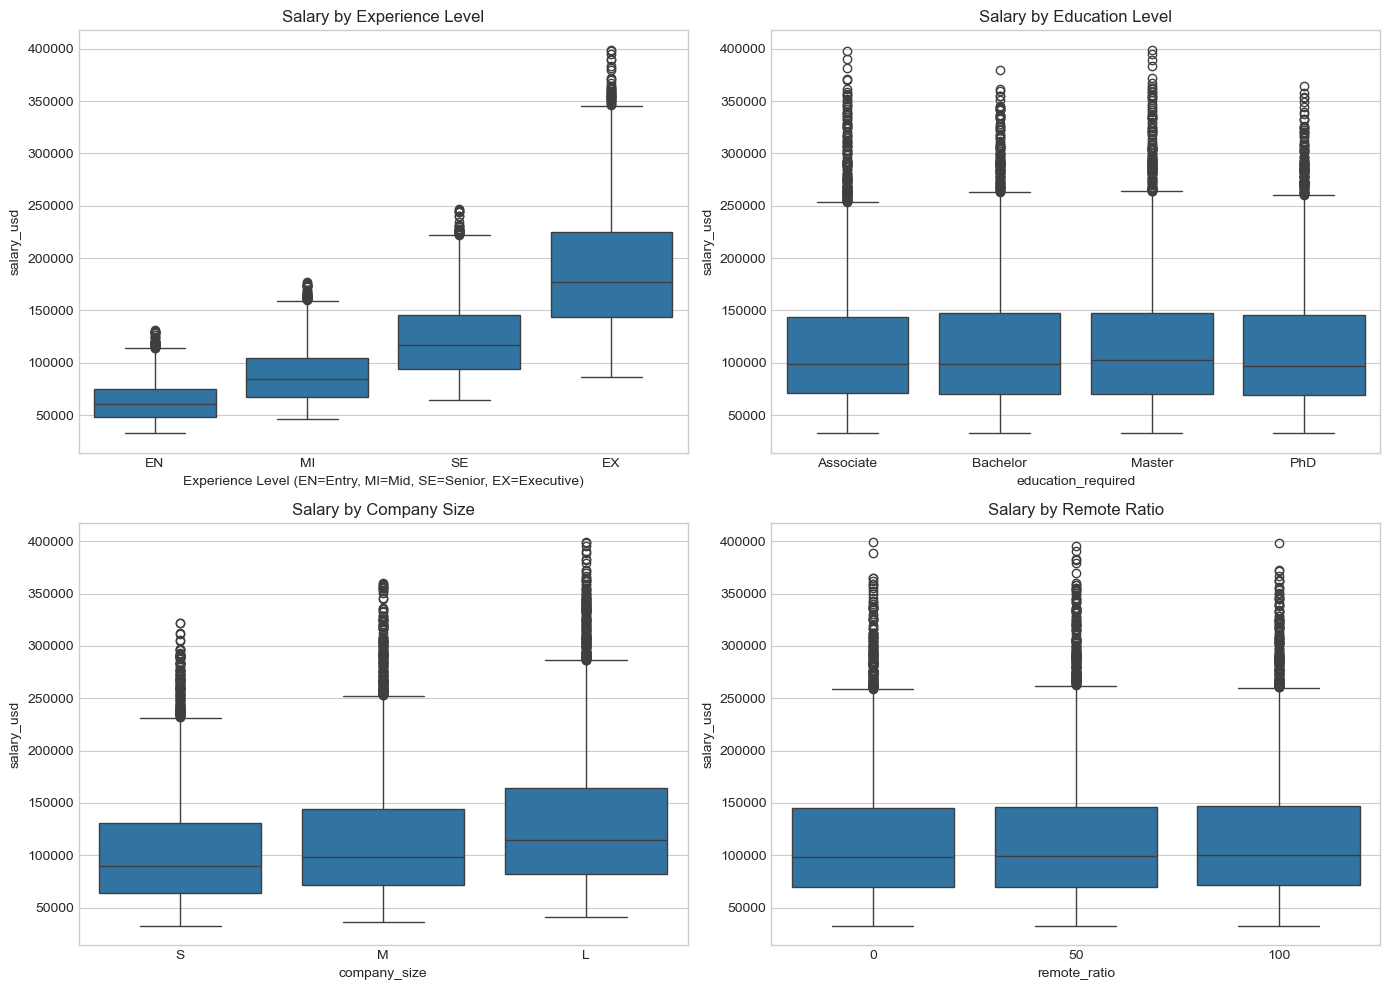

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Experience Level vs Salary
exp_order = ['EN', 'MI', 'SE', 'EX']
sns.boxplot(data=df, x='experience_level', y='salary_usd', order=exp_order, ax=axes[0, 0])
axes[0, 0].set_title('Salary by Experience Level')
axes[0, 0].set_xlabel('Experience Level (EN=Entry, MI=Mid, SE=Senior, EX=Executive)')

# Education vs Salary
edu_order = ['Associate', 'Bachelor', 'Master', 'PhD']
sns.boxplot(data=df, x='education_required', y='salary_usd', order=edu_order, ax=axes[0, 1])
axes[0, 1].set_title('Salary by Education Level')

# Company Size vs Salary
size_order = ['S', 'M', 'L']
sns.boxplot(data=df, x='company_size', y='salary_usd', order=size_order, ax=axes[1, 0])
axes[1, 0].set_title('Salary by Company Size')

# Remote Ratio vs Salary
sns.boxplot(data=df, x='remote_ratio', y='salary_usd', ax=axes[1, 1])
axes[1, 1].set_title('Salary by Remote Ratio')

plt.tight_layout()
plt.show()

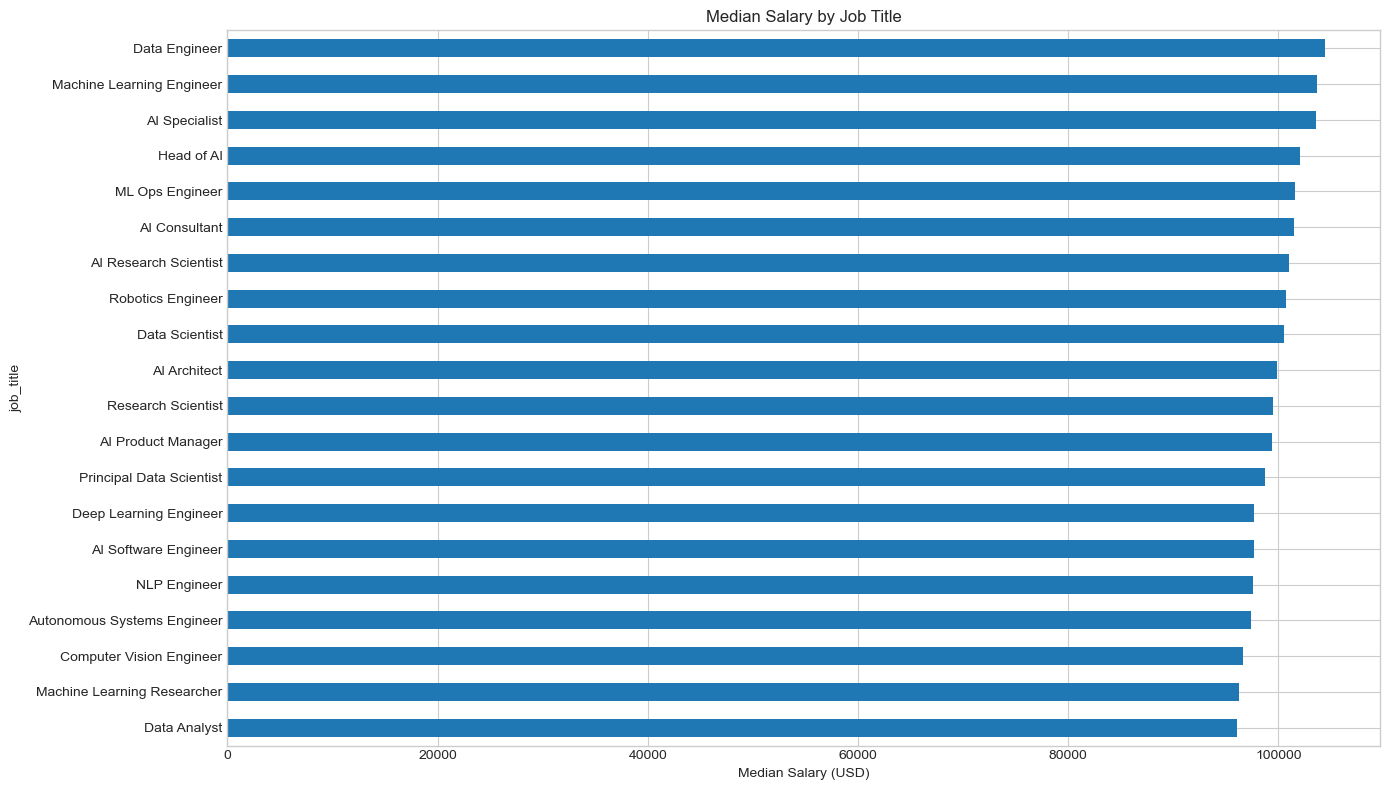

In [10]:
# Salary by Job Title
plt.figure(figsize=(14, 8))
job_salary = df.groupby('job_title')['salary_usd'].median().sort_values(ascending=True)
job_salary.plot(kind='barh')
plt.xlabel('Median Salary (USD)')
plt.title('Median Salary by Job Title')
plt.tight_layout()
plt.show()

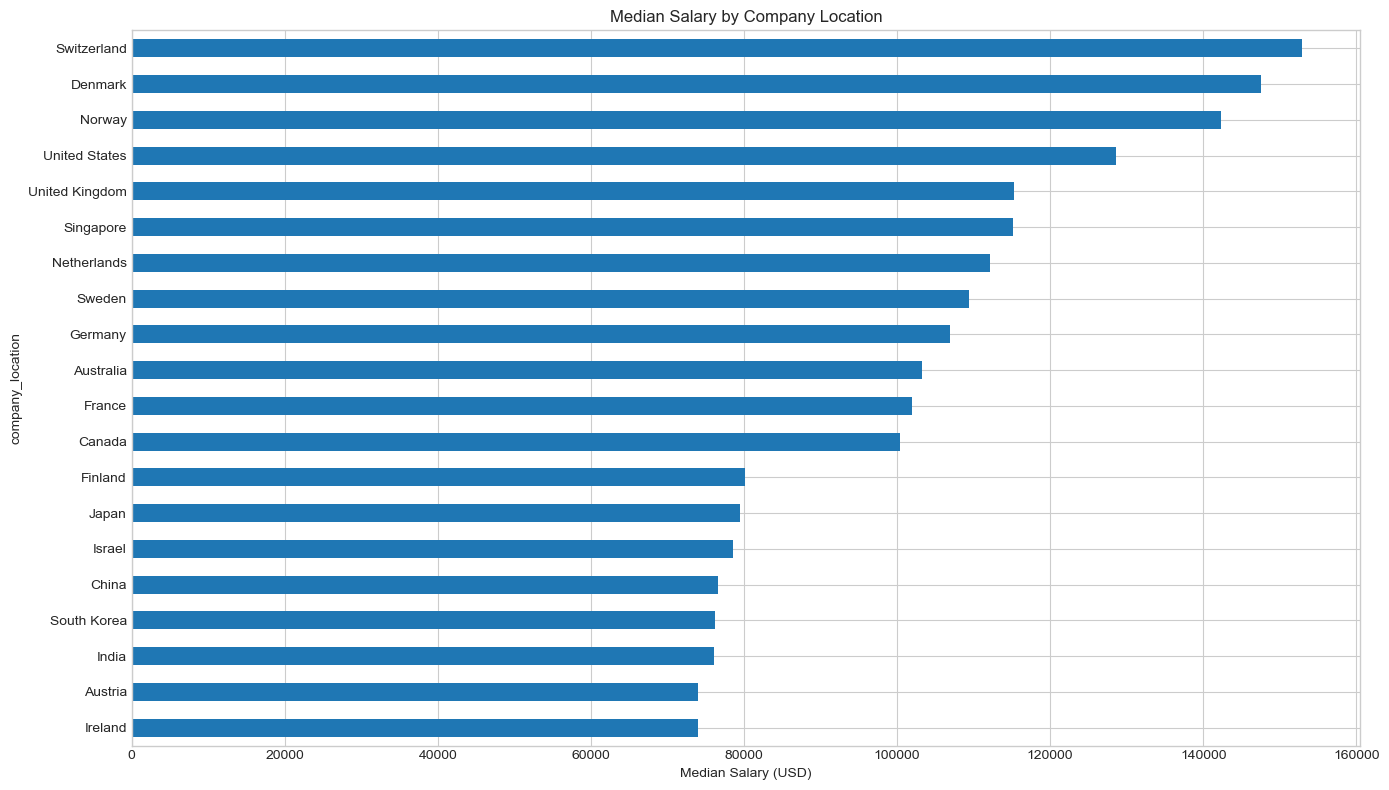

In [11]:
# Salary by Country
plt.figure(figsize=(14, 8))
country_salary = df.groupby('company_location')['salary_usd'].median().sort_values(ascending=True)
country_salary.plot(kind='barh')
plt.xlabel('Median Salary (USD)')
plt.title('Median Salary by Company Location')
plt.tight_layout()
plt.show()

## 5. Numerical Features Analysis

In [12]:
numerical_cols = ['years_experience', 'benefits_score', 'job_description_length']

for col in numerical_cols:
    print(f"\n{col}:")
    print(df[col].describe())


years_experience:
count    15000.000000
mean         6.253200
std          5.545768
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         19.000000
Name: years_experience, dtype: float64

benefits_score:
count    15000.000000
mean         7.504273
std          1.450870
min          5.000000
25%          6.200000
50%          7.500000
75%          8.800000
max         10.000000
Name: benefits_score, dtype: float64

job_description_length:
count    15000.000000
mean      1503.314733
std        576.127083
min        500.000000
25%       1003.750000
50%       1512.000000
75%       2000.000000
max       2499.000000
Name: job_description_length, dtype: float64


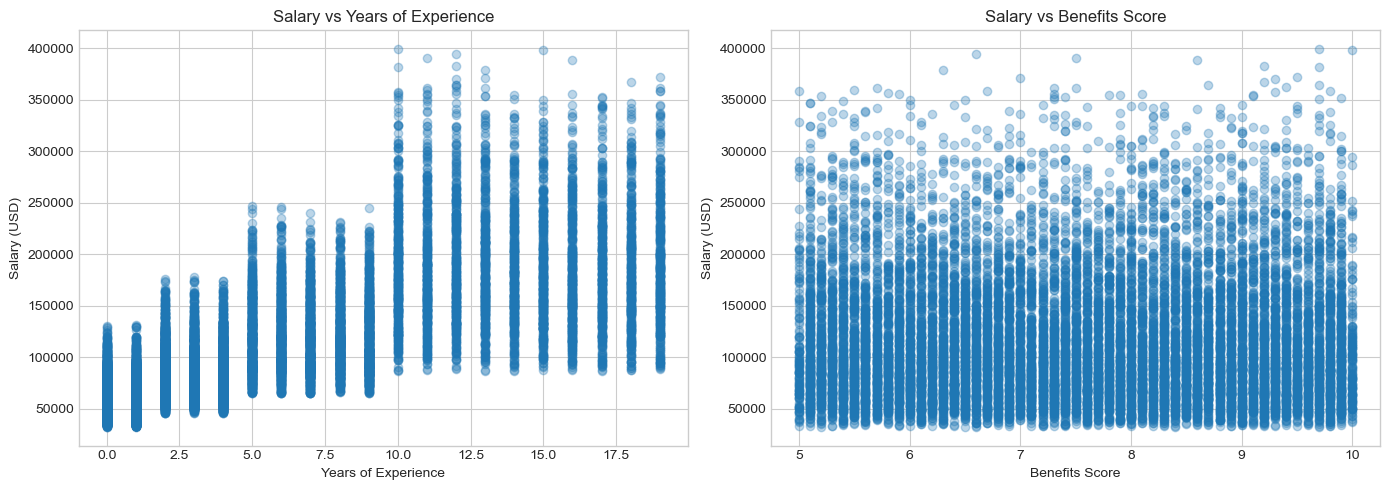

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Years Experience vs Salary
axes[0].scatter(df['years_experience'], df['salary_usd'], alpha=0.3)
axes[0].set_xlabel('Years of Experience')
axes[0].set_ylabel('Salary (USD)')
axes[0].set_title('Salary vs Years of Experience')

# Benefits Score vs Salary
axes[1].scatter(df['benefits_score'], df['salary_usd'], alpha=0.3)
axes[1].set_xlabel('Benefits Score')
axes[1].set_ylabel('Salary (USD)')
axes[1].set_title('Salary vs Benefits Score')

plt.tight_layout()
plt.show()

## 6. Skills Analysis

In [14]:
# Extract all skills
all_skills = []
for skills_str in df['required_skills']:
    skills = [s.strip() for s in skills_str.split(',')]
    all_skills.extend(skills)

skill_counts = pd.Series(all_skills).value_counts()
print(f"Total unique skills: {len(skill_counts)}")
print(f"\nTop 20 skills:")
print(skill_counts.head(20))

Total unique skills: 24

Top 20 skills:
Python                4450
SQL                   3407
TensorFlow            3022
Kubernetes            3009
Scala                 2794
PyTorch               2777
Linux                 2705
Git                   2631
Java                  2578
GCP                   2442
Hadoop                2419
Tableau               2341
R                     2311
Computer Vision       2284
Data Visualization    2270
Deep Learning         2189
MLOps                 2164
Spark                 2155
NLP                   2145
Azure                 2144
Name: count, dtype: int64


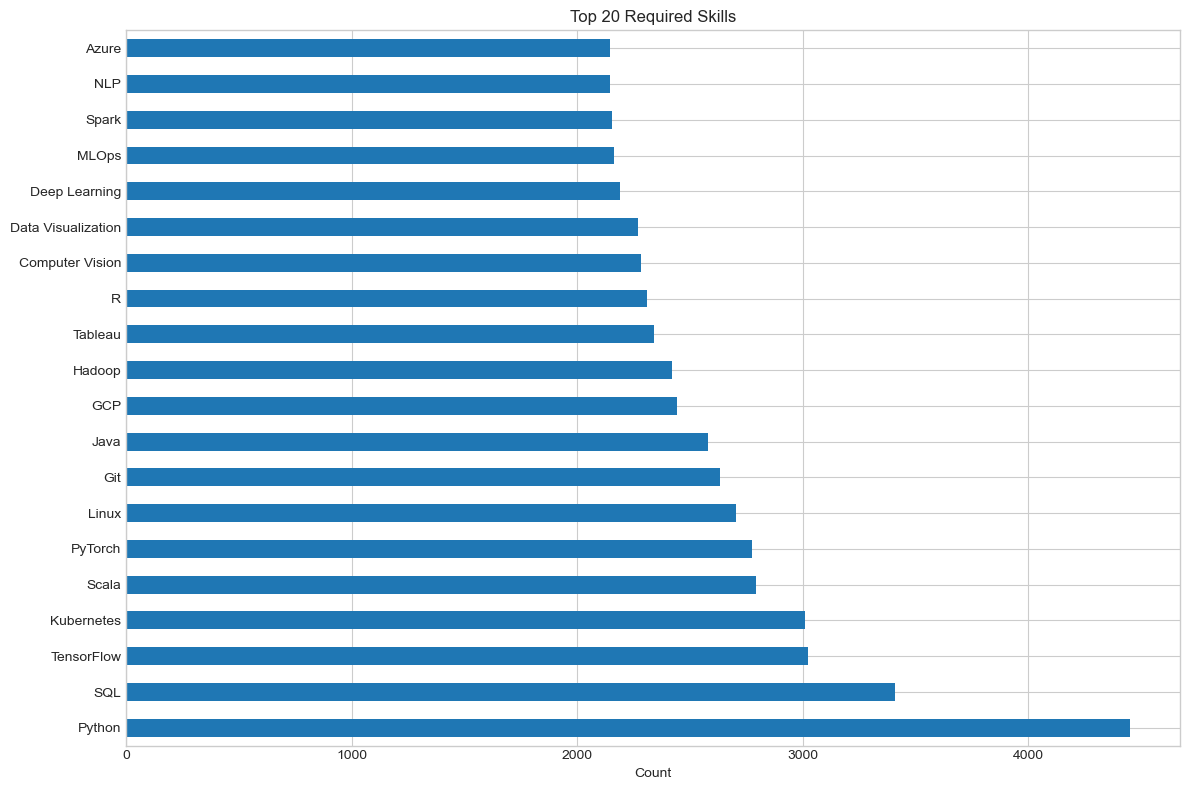

In [15]:
# Plot top skills
plt.figure(figsize=(12, 8))
skill_counts.head(20).plot(kind='barh')
plt.xlabel('Count')
plt.title('Top 20 Required Skills')
plt.tight_layout()
plt.show()

## 7. Correlation Analysis & Multicollinearity Check

In [16]:
# Encode ordinal features for correlation analysis
df_encoded = df.copy()

# Ordinal encoding
exp_map = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
edu_map = {'Associate': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}
size_map = {'S': 0, 'M': 1, 'L': 2}

df_encoded['experience_level_enc'] = df_encoded['experience_level'].map(exp_map)
df_encoded['education_required_enc'] = df_encoded['education_required'].map(edu_map)
df_encoded['company_size_enc'] = df_encoded['company_size'].map(size_map)

numerical_for_corr = ['salary_usd', 'years_experience', 'benefits_score', 
                      'experience_level_enc', 'education_required_enc', 
                      'company_size_enc', 'remote_ratio']

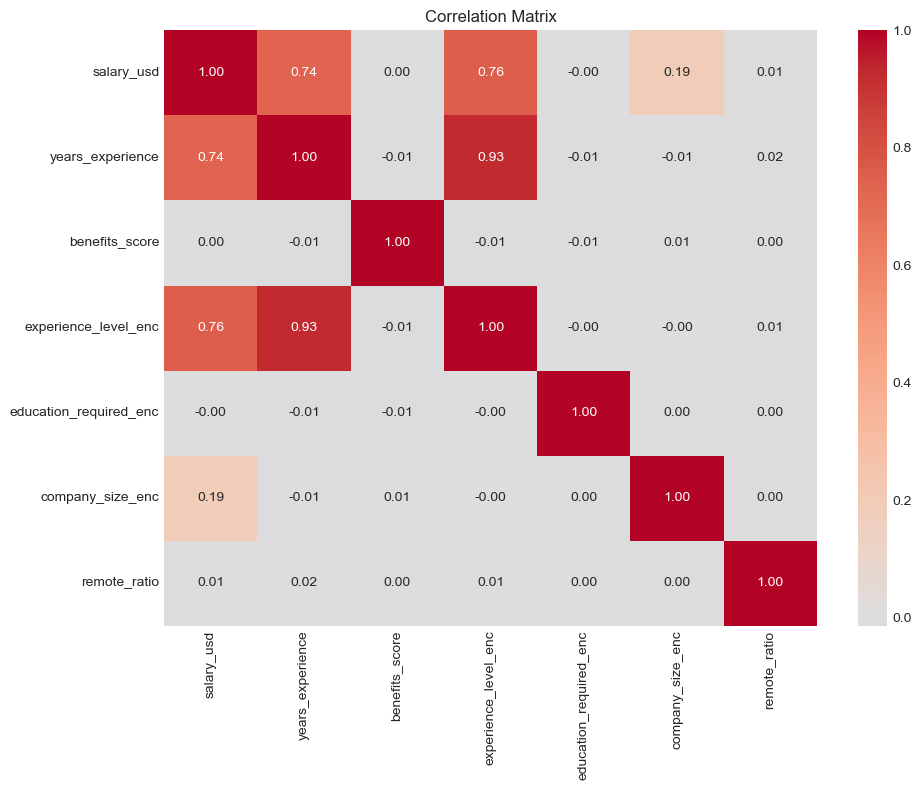

In [17]:
# Correlation matrix
corr_matrix = df_encoded[numerical_for_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [18]:
# Variance Inflation Factor (VIF) analysis for multicollinearity
features_for_vif = ['years_experience', 'benefits_score', 'experience_level_enc', 
                    'education_required_enc', 'company_size_enc', 'remote_ratio']

X_vif = df_encoded[features_for_vif].dropna()

vif_data = pd.DataFrame()
vif_data['Feature'] = features_for_vif
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(features_for_vif))]

print("Variance Inflation Factor (VIF) Analysis:")
print("VIF > 5 indicates moderate multicollinearity")
print("VIF > 10 indicates high multicollinearity")
print()
print(vif_data.sort_values('VIF', ascending=False))

Variance Inflation Factor (VIF) Analysis:
VIF > 5 indicates moderate multicollinearity
VIF > 10 indicates high multicollinearity

                  Feature        VIF
2    experience_level_enc  19.358677
0        years_experience  15.902494
1          benefits_score   6.104681
3  education_required_enc   2.621413
4        company_size_enc   2.396938
5            remote_ratio   2.372846


## 8. Industry Analysis

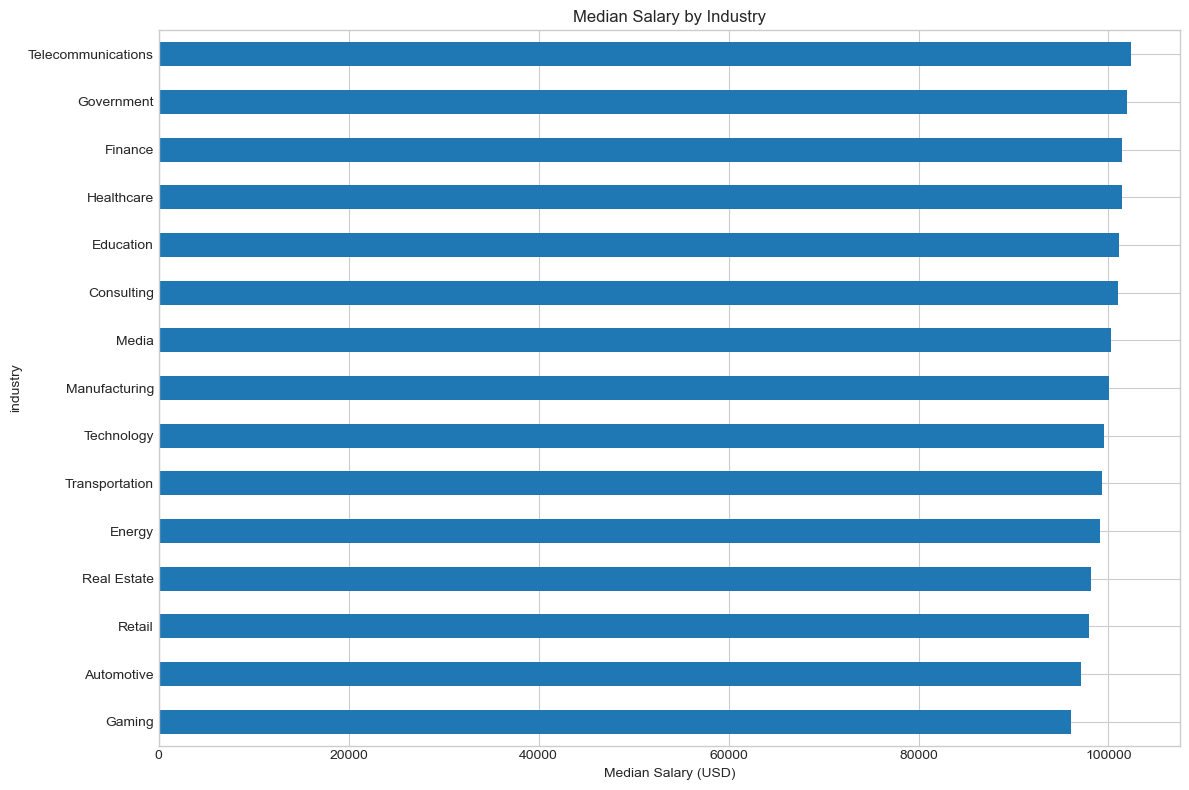

In [19]:
# Salary by Industry
plt.figure(figsize=(12, 8))
industry_salary = df.groupby('industry')['salary_usd'].median().sort_values(ascending=True)
industry_salary.plot(kind='barh')
plt.xlabel('Median Salary (USD)')
plt.title('Median Salary by Industry')
plt.tight_layout()
plt.show()

## 9. Key EDA Findings Summary

### Dataset Characteristics:
- **Size**: 14,999 rows × 19 columns
- **Target variable**: `salary_usd` with range $32,519 - $399,095

### Missing Values:
- Report missing value findings from above analysis

### Key Observations:
1. **Experience Level**: Higher experience levels correlate with higher salaries
2. **Education**: Advanced degrees (Master, PhD) associated with higher salaries
3. **Location**: Significant salary variation across countries
4. **Skills**: Python, SQL, and cloud skills (AWS) are most common

### Multicollinearity:
- Check VIF results for `years_experience` and `experience_level_enc`
- If VIF > 5, consider dropping one feature or using tree-based models

In [20]:
# Save processed data info for next notebook
print("Columns to use as features:")
feature_cols = ['job_title', 'experience_level', 'years_experience', 'required_skills', 
                'company_location', 'company_size', 'employment_type', 'remote_ratio', 
                'education_required', 'industry', 'benefits_score']
print(feature_cols)
print(f"\nTarget: salary_usd")

Columns to use as features:
['job_title', 'experience_level', 'years_experience', 'required_skills', 'company_location', 'company_size', 'employment_type', 'remote_ratio', 'education_required', 'industry', 'benefits_score']

Target: salary_usd
